In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


path = '../dataset/pv/20230216/continuous/continuous_1.gz'
data = pd.read_csv(path, compression='gzip', skiprows=7, delimiter='\t',header=None)
start_s=0
end_s=50
ms=False
data = data[:][:-7] #remove the final 7 rows for continuous_2 dataset
for j in range(len(data.columns)):
    data[j] = [float(i) for i in data[j]]
    
if not ms:  
    ts = data[0][1]-data[0][0]
    fs = int(np.rint(1/ts))
else:
    ts = (data[0][1]-data[0][0])/1000
    fs = int(np.rint(1/ts))

time = data[0][int(start_s*fs): int(end_s*fs)].to_numpy()-data[0][0]-start_s
pv = data[data.columns[1:]][int(start_s*fs): int(end_s*fs)].to_numpy()
audio = np.zeros(end_s*fs - start_s*fs)
# data

In [6]:
font = {'family': 'arial',
        'size': 18}
linecolors = ['#0067ba', '#8f8993', '#ccaf65', '#ffd700']

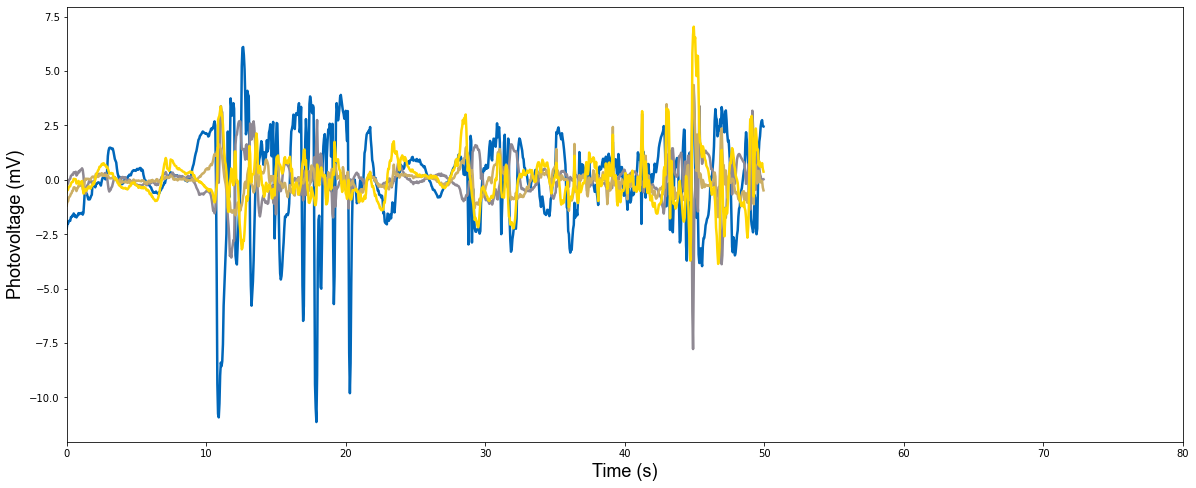

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
pv_det = seasonal_decompose(pv, model='additive', period=75, extrapolate_trend='freq')

fig = plt.figure(figsize=[20, 8])
ax = fig.add_subplot()

ax.set_xlim(0, 80)
# ax.set_xticks(np.arange(0, 100, 20))
# ax.set_xticklabels(np.arange(0, 100, 20), fontdict=font)
ax.set_xlabel('Time (s)', fontdict=font)

# ax.set_ylim(325, 385)
# ax.set_yticks(np.arange(325, 395, 10))
# ax.set_yticklabels(np.arange(325, 395, 10), fontdict=font)
ax.set_ylabel('Photovoltage (mV)', fontdict=font)

lines = ax.plot(time, pv-pv_det.trend)
for ii, line in enumerate(lines):
    line.set_linewidth(2.5)
    line.set_color(linecolors[ii])

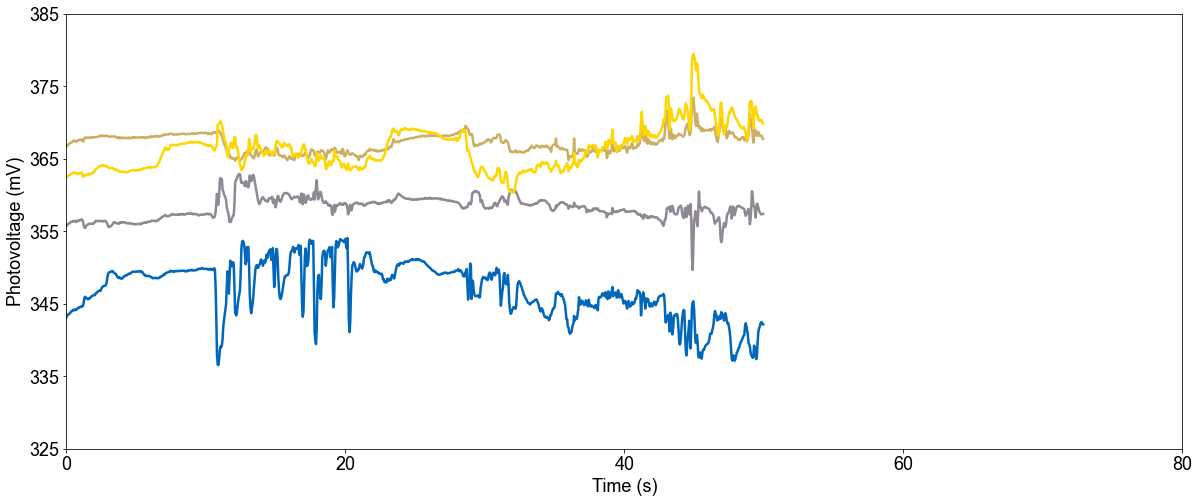

In [8]:


fig = plt.figure(figsize=[20, 8])
ax = fig.add_subplot()

ax.set_xlim(0, 80)
ax.set_xticks(np.arange(0, 100, 20))
ax.set_xticklabels(np.arange(0, 100, 20), fontdict=font)
ax.set_xlabel('Time (s)', fontdict=font)

ax.set_ylim(325, 385)
ax.set_yticks(np.arange(325, 395, 10))
ax.set_yticklabels(np.arange(325, 395, 10), fontdict=font)
ax.set_ylabel('Photovoltage (mV)', fontdict=font)

lines = ax.plot(time, pv)
for ii, line in enumerate(lines):
    line.set_linewidth(2.5)
    line.set_color(linecolors[ii])

plt.show()

Text(0, 0.5, 'Photovoltage (mV)')

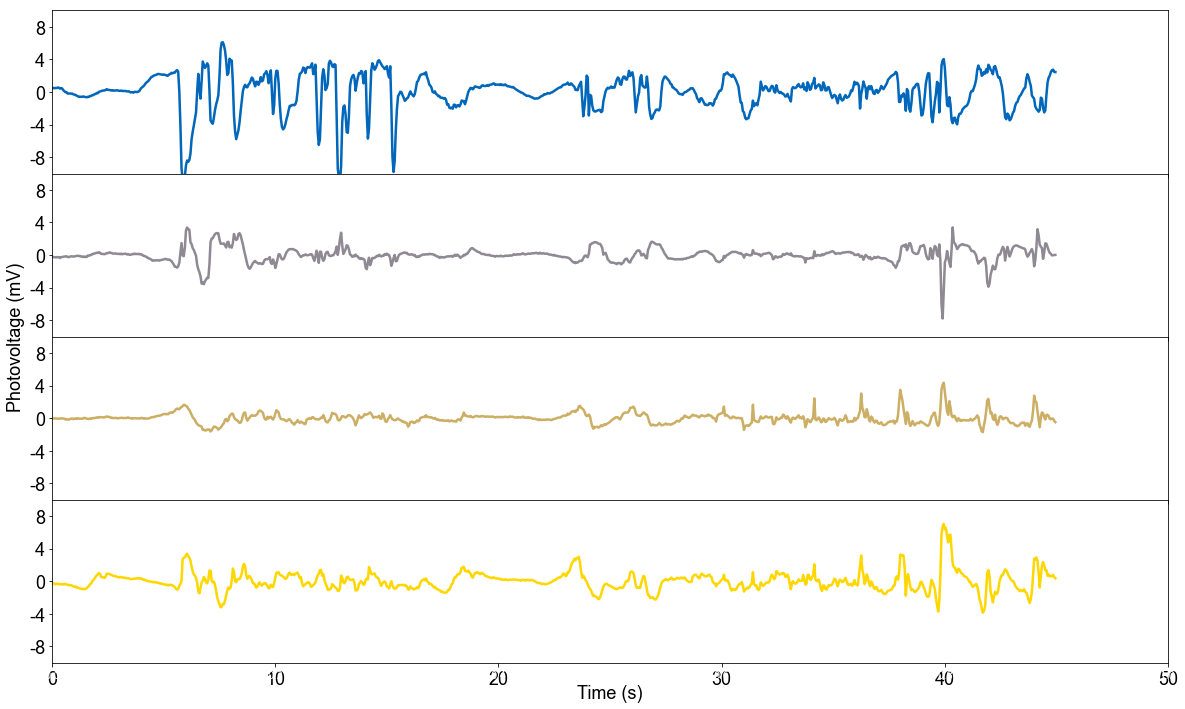

In [9]:
fig, axes = plt.subplots(4, figsize=[20, 12], sharex=True)
for ii, ax in enumerate(axes):
    line, = ax.plot(time, pv[:, ii]-pv_det.trend[:, ii], linewidth=2.5)
    line.set_color(linecolors[ii])
    
    ax.set_xlim(5, 50)
    ax.set_xticks(np.arange(5, 60, 10))
    ax.set_xticklabels(np.arange(0, 60, 10), fontdict=font)

    ax.set_ylim(-10, 10)
    ax.set_yticks(np.arange(-8, 10, 4))
    ax.set_yticklabels(np.arange(-8, 10, 4), fontdict=font)
    # ax.set_ylabel('Photovoltage (mV)', fontdict=font)

plt.subplots_adjust(hspace=0, wspace=0)

ax_label = fig.add_subplot(111)
ax_label.spines['top'].set_color('none')
ax_label.spines['bottom'].set_color('none')
ax_label.spines['left'].set_color('none')
ax_label.spines['right'].set_color('none')
ax_label.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax_label.patch.set_alpha(0.0)

ax_label.set_xlabel('Time (s)', fontdict=font)
ax_label.set_ylabel('Photovoltage (mV)', fontdict=font)

Loading in pv data for separated_2

In [11]:
path = '../dataset/pv/20230216/separated/separated_2.gz'
data = pd.read_csv(path, compression='gzip', skiprows=7, delimiter='\t',header=None)
start_s=0
end_s=100
ms=False
# data = data[:][:-7] #remove the final 7 rows for continuous_2 dataset
for j in range(len(data.columns)):
    data[j] = [float(i) for i in data[j]]
    
if not ms:  
    ts = data[0][1]-data[0][0]
    fs = int(np.rint(1/ts))
else:
    ts = (data[0][1]-data[0][0])/1000
    fs = int(np.rint(1/ts))

time_cough = data[0][int(start_s*fs): int(end_s*fs)].to_numpy()-data[0][0]-start_s
pv_cough = data[data.columns[1:]][int(start_s*fs): int(end_s*fs)].to_numpy()
audio_cough = np.zeros(end_s*fs - start_s*fs)
# print(timestamps)

from statsmodels.tsa.seasonal import seasonal_decompose
pv_cough_det = seasonal_decompose(pv_cough, model='additive', period=75, extrapolate_trend='freq')

# fig = plt.figure(figsize=[5,5])
# ax = fig.add_subplot()

# ax.set_xlim(6, 16)
# # ax.set_xticks(np.arange(0, 100, 20))
# # ax.set_xticklabels(np.arange(0, 100, 20), fontdict=font)
# ax.set_xlabel('Time (s)', fontdict=font)

# # ax.set_ylim(325, 385)
# # ax.set_yticks(np.arange(325, 395, 10))
# # ax.set_yticklabels(np.arange(325, 395, 10), fontdict=font)
# ax.set_ylabel('Photovoltage (mV)', fontdict=font)

# lines = ax.plot(time_cough, pv_cough-pv_cough_det.trend)
# for ii, line in enumerate(lines):
#     line.set_linewidth(2.5)
#     line.set_color(linecolors[ii])

# plt.show()

In [140]:
# fig = plt.figure(figsize=[5,5])
# ax = fig.add_subplot()

# ax.set_xlim(0, 10)
# # ax.set_xticks(np.arange(0, 100, 20))
# # ax.set_xticklabels(np.arange(0, 100, 20), fontdict=font)
# ax.set_xlabel('Time (s)', fontdict=font)

# # ax.set_ylim(325, 385)
# # ax.set_yticks(np.arange(325, 395, 10))
# # ax.set_yticklabels(np.arange(325, 395, 10), fontdict=font)
# ax.set_ylabel('Photovoltage (mV)', fontdict=font)

# lines = ax.plot(time, pv-pv_det.trend)
# for ii, line in enumerate(lines):
#     line.set_linewidth(2.5)
#     line.set_color(linecolors[ii])

# plt.show()

In [141]:
# fig = plt.figure(figsize=[5,5])
# ax = fig.add_subplot()

# ax.set_xlim(57, 67)
# # ax.set_xticks(np.arange(0, 100, 20))
# # ax.set_xticklabels(np.arange(0, 100, 20), fontdict=font)
# ax.set_xlabel('Time (s)', fontdict=font)

# # ax.set_ylim(325, 385)
# # ax.set_yticks(np.arange(325, 395, 10))
# # ax.set_yticklabels(np.arange(325, 395, 10), fontdict=font)
# ax.set_ylabel('Photovoltage (mV)', fontdict=font)

# lines = ax.plot(time, pv-pv_det.trend)
# for ii, line in enumerate(lines):
#     line.set_linewidth(2.5)
#     line.set_color(linecolors[ii])

# plt.show()

In [142]:
# fig = plt.figure(figsize=[5,5])
# ax = fig.add_subplot()

# ax.set_xlim(10, 20)
# # ax.set_xticks(np.arange(0, 100, 20))
# # ax.set_xticklabels(np.arange(0, 100, 20), fontdict=font)
# ax.set_xlabel('Time (s)', fontdict=font)

# # ax.set_ylim(325, 385)
# # ax.set_yticks(np.arange(325, 395, 10))
# # ax.set_yticklabels(np.arange(325, 395, 10), fontdict=font)
# ax.set_ylabel('Photovoltage (mV)', fontdict=font)

# lines = ax.plot(time, pv-pv_det.trend)
# for ii, line in enumerate(lines):
#     line.set_linewidth(2.5)
#     line.set_color(linecolors[ii])

# plt.show()

Loading in pv data for continuous_2

In [12]:
path = '../dataset/pv/20230216/continuous/continuous_2.gz'
data = pd.read_csv(path, compression='gzip', skiprows=7, delimiter='\t',header=None)
start_s=0
end_s=50
ms=False
data = data[:][:-7] #remove the final 7 rows for continuous_2 dataset
for j in range(len(data.columns)):
    data[j] = [float(i) for i in data[j]]
    
if not ms:  
    ts = data[0][1]-data[0][0]
    fs = int(np.rint(1/ts))
else:
    ts = (data[0][1]-data[0][0])/1000
    fs = int(np.rint(1/ts))

time_2 = data[0][int(start_s*fs): int(end_s*fs)].to_numpy()-data[0][0]-start_s
pv_2 = data[data.columns[1:]][int(start_s*fs): int(end_s*fs)].to_numpy()
audio = np.zeros(end_s*fs - start_s*fs)

from statsmodels.tsa.seasonal import seasonal_decompose
pv_det_2 = seasonal_decompose(pv_2, model='additive', period=75, extrapolate_trend='freq')

# fig = plt.figure(figsize=[20, 8])
# ax = fig.add_subplot()

# ax.set_xlim(10, 20)
# # ax.set_xticks(np.arange(0, 60, 20))
# # ax.set_xticklabels(np.arange(0, 100, 20), fontdict=font)
# ax.set_xlabel('Time (s)', fontdict=font)

# # ax.set_ylim(325, 385)
# # ax.set_yticks(np.arange(325, 395, 10))
# # ax.set_yticklabels(np.arange(325, 395, 10), fontdict=font)
# ax.set_ylabel('Photovoltage (mV)', fontdict=font)

# lines = ax.plot(time_2, pv_2-pv_det_2.trend)
# for ii, line in enumerate(lines):
#     line.set_linewidth(2.5)
#     line.set_color(linecolors[ii])

Output pv data for cough, sit, talk, and swallow.

Using 6-16s from separated_2 for cough

Using 0-10s from continuous_1 for sit

Using 10-20s from continuous_2 for talk

Using 22-32s from continuous_2 for swallow

/var/folders/8z/m4kbswp17qq4hy08by5m6m800000gn/T/ipykernel_83183/2767992032.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(0, 12, 2), fontdict=font)


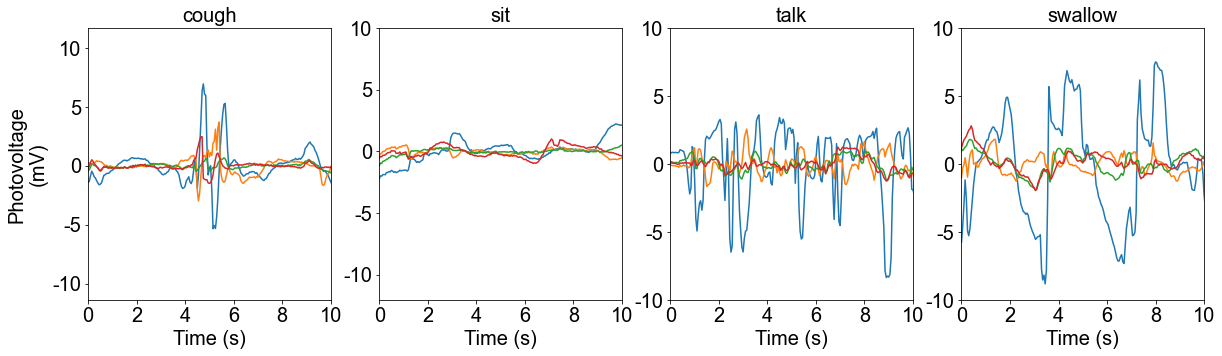

In [13]:
font = {'family': 'arial',
        'weight': 'normal',
        'size': 20,
        }

fig, axes = plt.subplots(nrows=1,
                         ncols=4)
fig.set_size_inches(20, 5)
fig.subplots_adjust(hspace=0, wspace=0.2)

axes[0].plot(time_cough, pv_cough-pv_cough_det.trend)
axes[0].set_xlim(6,16)
axes[0].set_xticks(np.arange(6, 18, 2))
axes[0].set_title('cough', fontdict=font)

axes[1].plot(time, pv-pv_det.trend)
axes[1].set_xlim(0,10)
axes[1].set_xticks(np.arange(0, 12, 2))
axes[1].set_title('sit', fontdict=font)

# use continuous_2 for talking data
axes[2].plot(time_2, pv_2-pv_det_2.trend)
axes[2].set_xlim(10,20)
ax.set_xticks(np.arange(10, 22, 2))
axes[2].set_title('talk', fontdict=font)

axes[3].plot(time_2, pv_2-pv_det_2.trend)
axes[3].set_xlim(22,32)
ax.set_xticks(np.arange(22, 33, 2))
axes[3].set_title('swallow', fontdict=font)
axes[0].set_ylabel('Photovoltage\n(mV)', fontdict=font)

for ax in axes:
    ax.set_xlabel('Time (s)', fontdict=font)
    ax.set_xticklabels(np.arange(0, 12, 2), fontdict=font)
    ax.set_yticks(np.arange(-10, 15, 5))
    ax.set_yticklabels(np.arange(-10, 15, 5), fontdict=font)
#     ax.set_ylabel('Photovoltage\n(mV)', fontdict=font)
plt.savefig("pv_image")
plt.show()

Loading in orientation data for continuous_1

In [14]:
path = '../dataset/orientation/20230216/continuous/continuous_1.gz'
data = pd.read_csv(path, compression='gzip', skiprows=7, delimiter='\t',header=None)
start_s=0
end_s=70
ms=True
# data = data[:][:-7] #remove the final 7 rows for continuous_2 dataset
for j in range(len(data.columns)):
    data[j] = [float(i) for i in data[j]]
    
if not ms:  
    ts = data[0][1]-data[0][0]
    fs = int(np.rint(1/ts))
else:
    ts = (data[0][1]-data[0][0])/1000
    fs = int(np.rint(1/ts))

timestamps = data[0][int(start_s*fs): int(end_s*fs)].to_numpy()-data[0][0]-start_s
orientation = data[data.columns[1:]][int(start_s*fs): int(end_s*fs)].to_numpy()
audio = np.zeros(end_s*fs - start_s*fs)
# print(len(timestamps))

# fig = plt.figure(figsize=[20, 8])
# ax = fig.add_subplot()

# ax.set_xlim(0, 10000)
# ax.set_xticks(np.arange(0, 12000, 2000))
# ax.set_xticklabels(np.arange(0, 120, 20), fontdict=font)
# ax.set_xlabel('Time (s)', fontdict=font)

# ax.set_ylim(0, 180)
# ax.set_yticks(np.arange(0, 200, 30))
# ax.set_yticklabels(np.arange(0, 200, 30), fontdict=font)
# ax.set_ylabel('Euler angles ($^\circ$)', fontdict=font)

# lines = ax.plot(timestamps, orientation)
# for ii, line in enumerate(lines):
#     line.set_linewidth(2.5)
#     line.set_color(linecolors[ii])

# plt.show()

In [127]:
# fig = plt.figure(figsize=[20, 8])
# ax = fig.add_subplot()

# ax.set_xlim(10000, 20000)
# ax.set_xticks(np.arange(10000, 22000, 2000))
# ax.set_xticklabels(np.arange(100, 220, 20), fontdict=font)
# ax.set_xlabel('Time (s)', fontdict=font)

# ax.set_ylim(0, 180)
# ax.set_yticks(np.arange(0, 200, 30))
# ax.set_yticklabels(np.arange(0, 200, 30), fontdict=font)
# ax.set_ylabel('Euler angles ($^\circ$)', fontdict=font)

# lines = ax.plot(timestamps, orientation)
# for ii, line in enumerate(lines):
#     line.set_linewidth(2.5)
#     line.set_color(linecolors[ii])

# plt.show()

In [128]:
# fig = plt.figure(figsize=[20, 8])
# ax = fig.add_subplot()

# ax.set_xlim(26700, 36600)
# ax.set_xticks(np.arange(26700, 36800, 2000))
# ax.set_xticklabels(np.arange(0, 120, 20), fontdict=font)
# ax.set_xlabel('Time (s)', fontdict=font)

# ax.set_ylim(-180, 180)
# ax.set_yticks(np.arange(0, 200, 30))
# ax.set_yticklabels(np.arange(0, 200, 30), fontdict=font)
# ax.set_ylabel('Euler angles ($^\circ$)', fontdict=font)

# lines = ax.plot(timestamps, orientation)
# for ii, line in enumerate(lines):
#     line.set_linewidth(2.5)
#     line.set_color(linecolors[ii])

# plt.show()

Loading in orientation data of continuous_2

In [15]:
path = '../dataset/orientation/20230216/continuous/continuous_2.gz'
data = pd.read_csv(path, compression='gzip', skiprows=7, delimiter='\t',header=None)
start_s=0
end_s=50
ms=True
data = data[:][:-7] #remove the final 7 rows for continuous_2 dataset
for j in range(len(data.columns)):
    data[j] = [float(i) for i in data[j]]
    
if not ms:  
    ts = data[0][1]-data[0][0]
    fs = int(np.rint(1/ts))
else:
    ts = (data[0][1]-data[0][0])/1000
    fs = int(np.rint(1/ts))

timestamps_2 = data[0][int(start_s*fs): int(end_s*fs)].to_numpy()-data[0][0]-start_s
orientation_2 = data[data.columns[1:]][int(start_s*fs): int(end_s*fs)].to_numpy()
audio = np.zeros(end_s*fs - start_s*fs)
# print(timestamps)

# fig = plt.figure(figsize=[8, 8])
# ax = fig.add_subplot()

# ax.set_xlim(10000, 20000)
# ax.set_xticks(np.arange(10000, 21000, 2000))
# ax.set_xticklabels(np.arange(0, 12, 2), fontdict=font)
# ax.set_xlabel('Time (s)', fontdict=font)

# ax.set_ylim(0, 180)
# ax.set_yticks(np.arange(0, 200, 30))
# ax.set_yticklabels(np.arange(0, 200, 30), fontdict=font)
# ax.set_ylabel('Euler angles ($^\circ$)', fontdict=font)

# lines = ax.plot(timestamps_2, orientation_2)
# for ii, line in enumerate(lines):
#     line.set_linewidth(2.5)
#     line.set_color(linecolors[ii])

# plt.show()

Load in orientation data for separated_2

In [16]:
path = '../dataset/orientation/20230216/separated/separated_2.gz'
data = pd.read_csv(path, compression='gzip', skiprows=7, delimiter='\t',header=None)
start_s=0
end_s=70
ms=True
# data = data[:][:-7] #remove the final 7 rows for continuous_2 dataset
for j in range(len(data.columns)):
    data[j] = [float(i) for i in data[j]]
    
if not ms:  
    ts = data[0][1]-data[0][0]
    fs = int(np.rint(1/ts))
else:
    ts = (data[0][1]-data[0][0])/1000
    fs = int(np.rint(1/ts))

timestamps_cough = data[0][int(start_s*fs): int(end_s*fs)].to_numpy()-data[0][0]-start_s
orientation_cough = data[data.columns[1:]][int(start_s*fs): int(end_s*fs)].to_numpy()
audio = np.zeros(end_s*fs - start_s*fs)
# print(len(timestamps))

# fig = plt.figure(figsize=[20, 8])
# ax = fig.add_subplot()

# ax.set_xlim(6000, 16000)
# ax.set_xticks(np.arange(6000, 17000, 2000))
# ax.set_xticklabels(np.arange(0, 120, 20), fontdict=font)
# ax.set_xlabel('Time (s)', fontdict=font)

# ax.set_ylim(-100, 180)
# ax.set_yticks(np.arange(0, 200, 30))
# ax.set_yticklabels(np.arange(0, 200, 30), fontdict=font)
# ax.set_ylabel('Euler angles ($^\circ$)', fontdict=font)

# lines = ax.plot(timestamps_cough, orientation_cough)
# for ii, line in enumerate(lines):
#     line.set_linewidth(2.5)
#     line.set_color(linecolors[ii])

# plt.show()

/var/folders/8z/m4kbswp17qq4hy08by5m6m800000gn/T/ipykernel_83183/2954437243.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(0, 12, 2), fontdict=font)


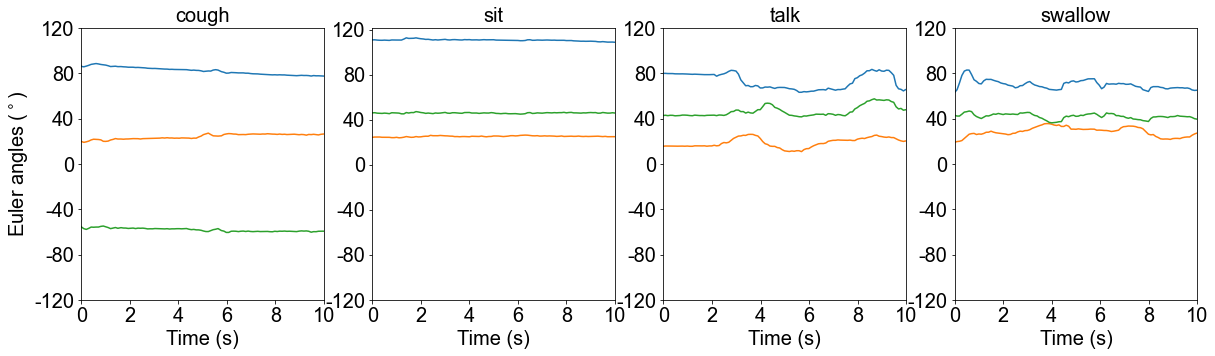

In [17]:
font = {'family': 'arial',
        'weight': 'normal',
        'size': 20,
        }

fig, axes = plt.subplots(nrows=1,
                         ncols=4)
fig.set_size_inches(20, 5)
fig.subplots_adjust(hspace=0, wspace=0.2)

axes[0].plot(timestamps_cough, orientation_cough)
axes[0].set_xlim(6000,16000)
axes[0].set_xticks(np.arange(6000, 17000, 2000))
axes[0].set_title('cough', fontdict=font)

axes[1].plot(timestamps, orientation)
axes[1].set_xlim(0,10000)
axes[1].set_xticks(np.arange(0, 12000, 2000))
axes[1].set_title('sit', fontdict=font)

# axes[2].plot(timestamps, orientation)
# axes[2].set_xlim(10000,20000)
# ax.set_xticks(np.arange(10000, 22000, 2000))
# axes[2].set_title('talk', fontdict=font)
# use the talk data from continuous_2
axes[2].plot(timestamps_2, orientation_2)
axes[2].set_xlim(10000, 20000)
axes[2].set_xticks(np.arange(10000, 21000, 2000))
axes[2].set_xticklabels(np.arange(0, 12, 2), fontdict=font)
axes[2].set_title('talk', fontdict=font)

axes[3].plot(timestamps_2, orientation_2)
axes[3].set_xlim(22000,32000)
ax.set_xticks(np.arange(22000, 33000, 2000))
axes[3].set_title('swallow', fontdict=font)
axes[0].set_ylabel('Euler angles ($^\circ$)', fontdict=font)

for ax in axes:
    ax.set_xlabel('Time (s)', fontdict=font)
    ax.set_xticklabels(np.arange(0, 12, 2), fontdict=font)
    ax.set_yticks(np.arange(-120, 140, 40))
    ax.set_yticklabels(np.arange(-120, 140, 40), fontdict=font)
#     ax.set_ylabel('Photovoltage\n(mV)', fontdict=font)
plt.savefig('orientation_image.png')
plt.show()
